### <p style="text-align: center;">Recommendation System for E-Commerce Platform</p>

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

### Dataset Exploration

In [4]:
data = pd.read_csv("data.csv", encoding='ISO-8859-1')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

Rows: 541909, Columns: 8


In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Dataset Pre-processing

In [10]:
# Check for missing values in the dataset
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [11]:
# Drop rows with missing 'CustomerID'
data_cleaned = data.dropna(subset=['CustomerID'])
data_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [12]:
# Fill missing 'Description' with 'Unknown'
data_cleaned['Description'].fillna('Unknown')
data_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [13]:
print(data_cleaned.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


#### Convert InvoiceDate to DateTime Format

In [15]:
data_cleaned = data_cleaned.copy()
# Force conversion to datetime and handle any erro
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'], errors='coerce')
# Handle invalid dates (if any) by dropping or filling them
data_cleaned = data_cleaned.dropna(subset=['InvoiceDate'])  # Drop rows with invalid dates

data_cleaned['YearMonth'] = data_cleaned['InvoiceDate'].dt.to_period('M')
data_cleaned['DayOfWeek'] = data_cleaned['InvoiceDate'].dt.day_name()

data_cleaned[['InvoiceDate', 'YearMonth', 'DayOfWeek']].head(5)


,InvoiceDate,YearMonth,DayOfWeek
0,2010-12-01 08:26:00,2010-12,Wednesday
1,2010-12-01 08:26:00,2010-12,Wednesday
2,2010-12-01 08:26:00,2010-12,Wednesday
3,2010-12-01 08:26:00,2010-12,Wednesday
4,2010-12-01 08:26:00,2010-12,Wednesday


In [16]:
# Create a new 'Revenue' column to visualize purchase trends
data_cleaned['Revenue'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

In [17]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,DayOfWeek,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,Wednesday,20.34


#### Detect and Handle Outliers

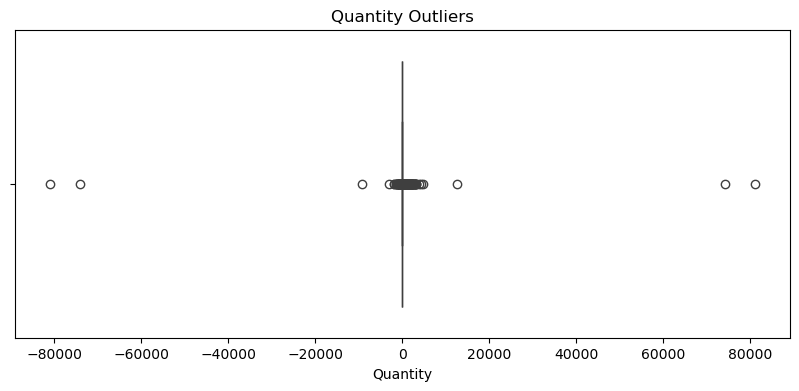

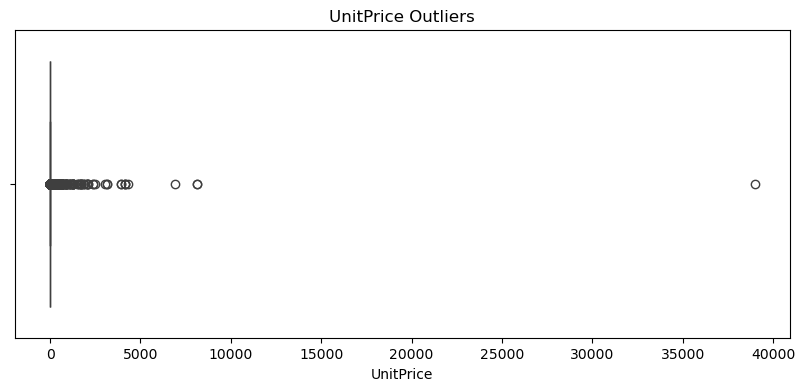

In [19]:
# Visualize outliers using boxplots
plt.figure(figsize=(10, 4))
sns.boxplot(x=data_cleaned['Quantity'])
plt.title('Quantity Outliers')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=data_cleaned['UnitPrice'])
plt.title('UnitPrice Outliers')
plt.show()

In [20]:
# Remove extreme outliers (e.g., negative quantities and prices)
data_cleaned = data_cleaned[(data_cleaned['Quantity'] > 0) & (data_cleaned['UnitPrice'] > 0)]

#### Analyze and Visualize Categorical Features

Country
United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1462
Australia           1182
Name: count, dtype: int64


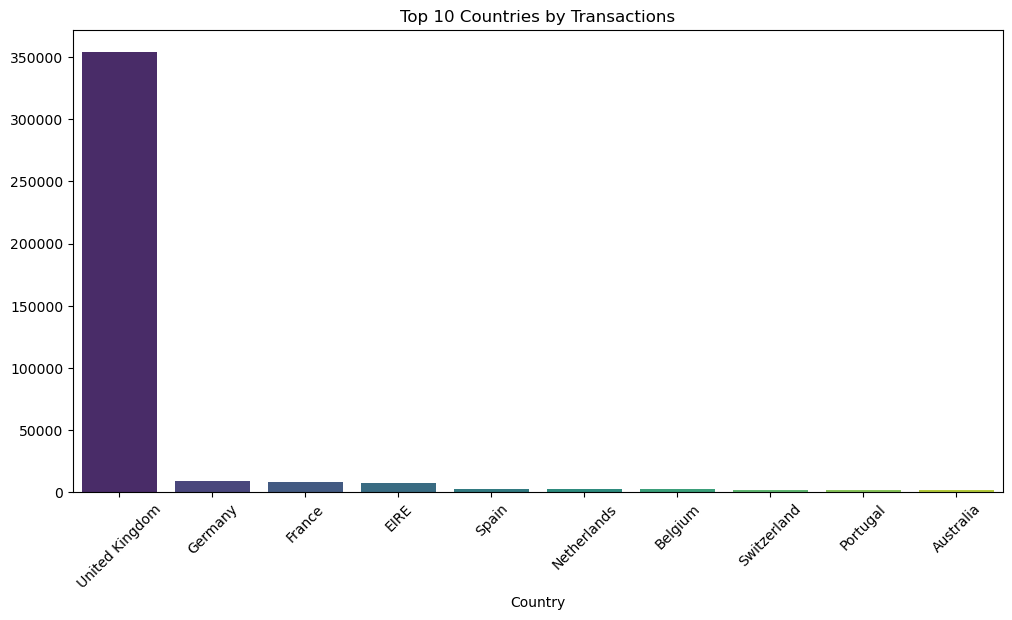

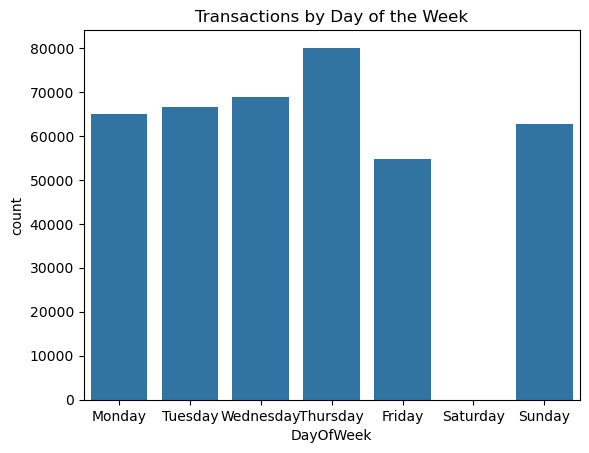

In [22]:
# Top 10 countries by number of transactions
top_countries = data_cleaned['Country'].value_counts().head(10)
print(top_countries)

# Visualize country-wise transaction count
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values,hue=top_countries.index,palette='viridis')
plt.title('Top 10 Countries by Transactions')
plt.xticks(rotation=45)
plt.show()

# Visualize transaction count by day of the week
sns.countplot(x='DayOfWeek', data=data_cleaned, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.title('Transactions by Day of the Week')
plt.show()


#### Check for Duplicates and Remove Them

In [24]:
print(f'Duplicates: {data_cleaned.duplicated().sum()}')
data_cleaned = data_cleaned.drop_duplicates()

Duplicates: 5192


#### Analyze and Visualize Purchase Trend Over Time

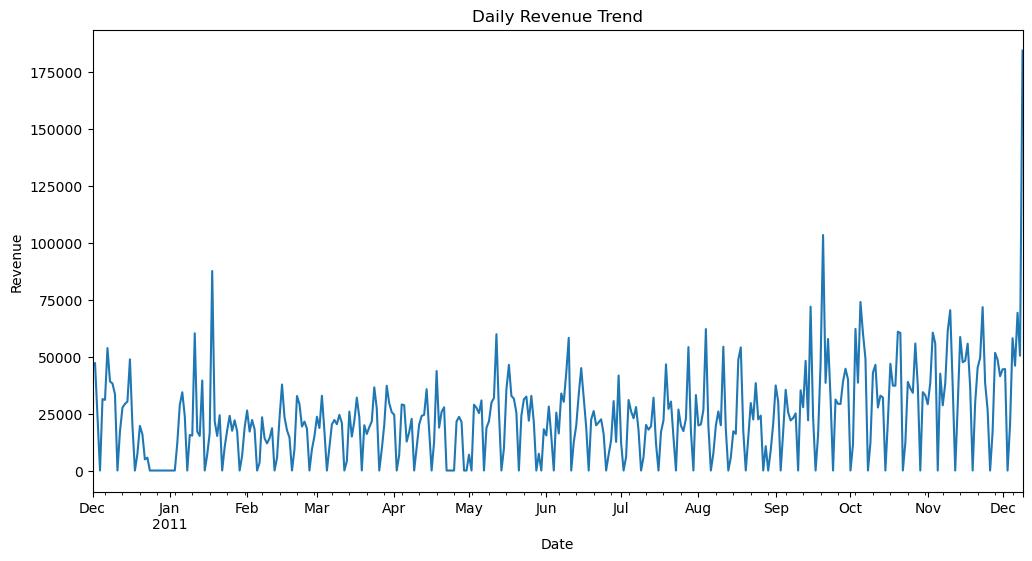

In [26]:
data_cleaned.set_index('InvoiceDate', inplace=True)
daily_revenue = data_cleaned['Revenue'].resample('D').sum()

plt.figure(figsize=(12, 6))
daily_revenue.plot()
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

### Product-Item Matrix

In [28]:
product_matrix = data_cleaned.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

print(f"Product Matrix Shape: {product_matrix.shape}")
product_matrix

Product Matrix Shape: (4338, 3877)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Compute Cosine Similarity between products
product_similarity = cosine_similarity(product_matrix.T)
product_similarity_df = pd.DataFrame(
    product_similarity, 
    index=product_matrix.columns, 
    columns=product_matrix.columns
)

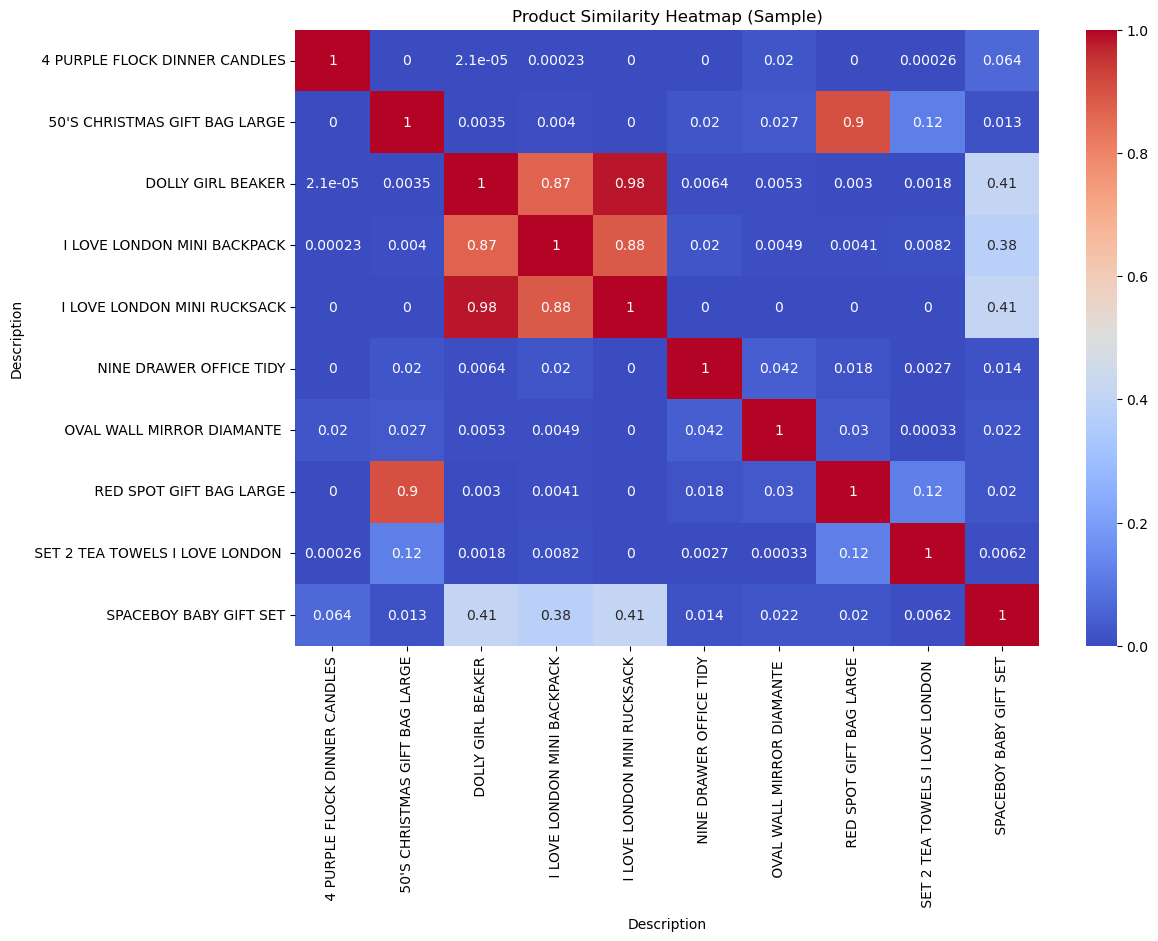

In [30]:
# Product Similarity Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(product_similarity_df.iloc[:10, :10], cmap='coolwarm', annot=True)
plt.title('Product Similarity Heatmap (Sample)')
plt.show()

#### Recommendation System

In [32]:
def get_product_recommendations(product_name, n_recommendations=5):
    """Recommend similar products based on cosine similarity."""
    if product_name not in product_similarity_df.columns:
        return f"Product '{product_name}' not found."

    # Get similarity scores for the given product
    similar_products = product_similarity_df[product_name].sort_values(ascending=False)[1:n_recommendations + 1]

    print(f"\nTop {n_recommendations} recommendations for '{product_name}':")
    for product, score in similar_products.items():
        print(f"{product} (Similarity Score: {score:.2f})")

#### Recommend Products by Category or Keyword

In [34]:
def recommend_by_keyword(keyword, n_recommendations=5):
    """Find products by keyword and recommend related products."""
    matching_products = [prod for prod in product_similarity_df.columns if keyword.lower() in prod.lower()]
    
    if not matching_products:
        return f"No products found with keyword '{keyword}'."

    print(f"\nProducts matching keyword '{keyword}': {', '.join(matching_products[:5])}...")

    # Recommend products for the first matching product
    get_product_recommendations(matching_products[0], n_recommendations)

In [35]:
# Clean and tokenize the descriptions
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.split()

#### Recommendation by Customer's username

In [37]:
def recommend_by_username(CustomerID):
    result = data_cleaned.loc[data_cleaned['CustomerID'] == CustomerID, 'Description']
    if result.empty:
        print(f"No data found for CustomerID: {CustomerID}")
    else:
        value = result.values[0]
        get_product_recommendations(value, n_recommendations=5)

#### Recommendation by Customer's all purchases

In [39]:
def find_recommendations(purchased_products,n_recommendations):
    # Clean and tokenize purchased products
    all_words = [word for product in purchased_products for word in clean_and_tokenize(product)]

    # Find the most common words in purchased products
    word_counts = Counter(all_words)
    most_common_word, frequency = word_counts.most_common(1)[0]  # Get the top word

    # Find recommendations based on the most common word
    recommendations = [product for product in data_cleaned["Description"] if most_common_word in clean_and_tokenize(product)]
    
    print(recommendations[:n_recommendations])

#### Recommend similar products for a specific product

In [41]:
get_product_recommendations("WASHROOM METAL SIGN", n_recommendations=5)


Top 5 recommendations for 'WASHROOM METAL SIGN':
LAUNDRY 15C METAL SIGN (Similarity Score: 0.99)
POTTING SHED CANDLE CITRONELLA (Similarity Score: 0.97)
POTTING SHED ROSE CANDLE (Similarity Score: 0.97)
METAL SIGN HER DINNER IS SERVED  (Similarity Score: 0.97)
CAST IRON HOOK GARDEN FORK (Similarity Score: 0.97)


#### Recommend products using a keyword

In [43]:
recommend_by_keyword("metal", n_recommendations=5)


Products matching keyword 'metal': 50CM METAL STRING WITH  7 CLIPS, AIRLINE LOUNGE,METAL SIGN, AREA PATROLLED METAL SIGN, ASSORTED COLOUR METAL CAT , BATHROOM METAL SIGN...

Top 5 recommendations for '50CM METAL STRING WITH  7 CLIPS':
RAINBOW PEGS PHOTO CLIP STRING (Similarity Score: 0.98)
PINK FLOCK PHOTO FRAME  (Similarity Score: 0.98)
BLUE MONTE CARLO HANDBAG (Similarity Score: 0.98)
PINK RIVIERA HANDBAG (Similarity Score: 0.98)
ASS COL CIRCLE MOBILE  (Similarity Score: 0.98)


#### Recommendation by Customer past purchases 

In [45]:
Customer_ID=int(input("Enter the Cusromer id: "))
recommend_by_username(Customer_ID)

Enter the Cusromer id:  13047



Top 5 recommendations for 'ASSORTED COLOUR BIRD ORNAMENT':
IVORY DINER WALL CLOCK (Similarity Score: 0.87)
JINGLE BELL HEART ANTIQUE SILVER (Similarity Score: 0.86)
GIRAFFE WOODEN RULER (Similarity Score: 0.84)
PAINT YOUR OWN CANVAS SET (Similarity Score: 0.84)
WHITE SKULL HOT WATER BOTTLE  (Similarity Score: 0.84)


#### Recommendation by Customer's all purchases

In [47]:
result = data_cleaned.loc[data_cleaned['CustomerID'] == Customer_ID, 'Description']
find_recommendations(result,n_recommendations=10)

['BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'ROUND SNACK BOXES SET OF4 WOODLAND ', 'PACK OF 72 RETROSPOT CAKE CASES', 'PACK OF 60 DINOSAUR CAKE CASES', 'PACK OF 60 PINK PAISLEY CAKE CASES', 'SET OF 6 FUNKY BEAKERS', 'HEART OF WICKER SMALL', 'HEART OF WICKER LARGE']
